<b>Installing dependencies</b>

In [7]:
import pandas as pd
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<b>Data Visualisation</b>

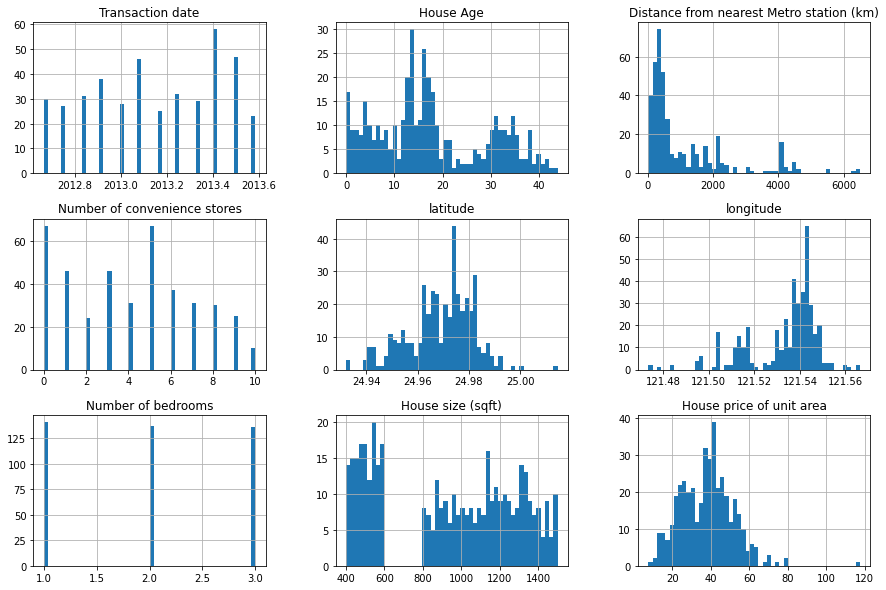

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(15,10))   #plots the graph of all the numeric attributes
plt.show()

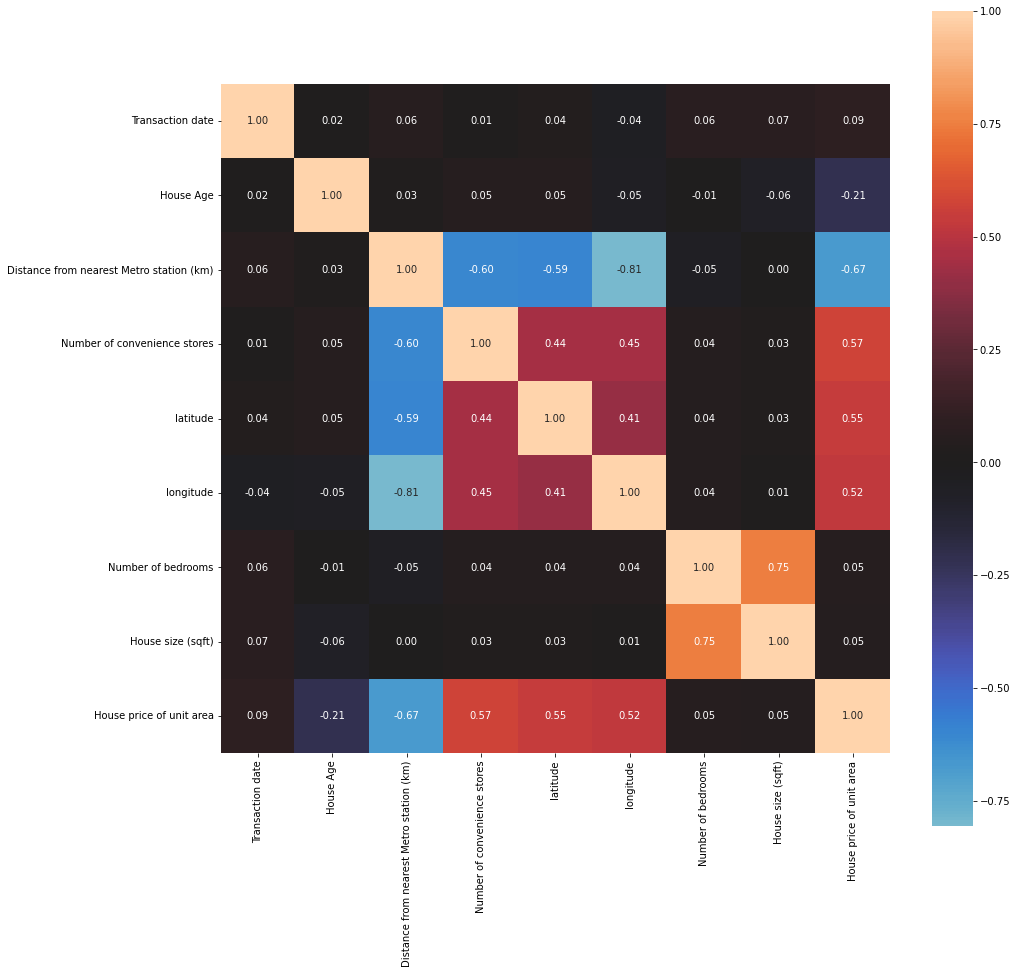

In [9]:
#Plotting heatmap to find correlations of the features
import seaborn as sns
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.show()

Area per bedroom and House size are highly correlated, so a new feature Area per bedroom is created and the other two are removed.

In [10]:
df["Area per bedroom"]=df["House size (sqft)"]/df["Number of bedrooms"]

In [11]:
df=df.drop(["Transaction date","Number of bedrooms","House size (sqft)"],axis=1)

In [12]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area,Area per bedroom
0,32.0,84.87882,10,24.98298,121.54024,37.9,575.000000
1,19.5,306.59470,9,24.98034,121.53951,42.2,620.000000
2,13.3,561.98450,5,24.98746,121.54391,47.3,353.333333
3,13.3,561.98450,5,24.98746,121.54391,54.8,437.500000
4,5.0,390.56840,5,24.97937,121.54245,43.1,491.000000
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,267.666667
410,5.6,90.45606,9,24.97433,121.54310,50.0,639.000000
411,18.8,390.96960,7,24.97923,121.53986,40.6,503.000000
412,8.1,104.81010,5,24.96674,121.54067,52.5,597.000000


<b>Outlier Detection</b>

In [13]:
mu,sigma=df["House Age"].mean(),df["House Age"].std()

In [14]:
len(df),len(df[(df["House Age"]>mu - 2*sigma) & (df["House Age"]< mu + 2*sigma)])

(414, 407)

In [15]:
#Taking only those data that are in the 95% Confidence interval
df=df[(df["House Age"]>mu - 2*sigma) & (df["House Age"]< mu + 2*sigma)]

In [16]:
mu,sigma=df["Distance from nearest Metro station (km)"].mean(),df["Distance from nearest Metro station (km)"].std()

In [17]:
len(df),len(df[(df["Distance from nearest Metro station (km)"]>mu - 2*sigma) & (df["Distance from nearest Metro station (km)"]< mu + 2*sigma)])

(407, 371)

In [18]:
#Taking only those data that are in the 95% Confidence interval
df=df[(df["Distance from nearest Metro station (km)"]>mu - 2*sigma) & (df["Distance from nearest Metro station (km)"]< mu + 2*sigma)]

In [19]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area,Area per bedroom
0,32.0,84.87882,10,24.98298,121.54024,37.9,575.000000
1,19.5,306.59470,9,24.98034,121.53951,42.2,620.000000
2,13.3,561.98450,5,24.98746,121.54391,47.3,353.333333
3,13.3,561.98450,5,24.98746,121.54391,54.8,437.500000
4,5.0,390.56840,5,24.97937,121.54245,43.1,491.000000
...,...,...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243,28.1,477.000000
410,5.6,90.45606,9,24.97433,121.54310,50.0,639.000000
411,18.8,390.96960,7,24.97923,121.53986,40.6,503.000000
412,8.1,104.81010,5,24.96674,121.54067,52.5,597.000000


In [20]:
df.rename(columns = {'House Age':'x1',
                        'Distance from nearest Metro station (km)':'x2',
                        'Number of convenience stores':'x3',
                        'latitude':'x4',
                        'longitude':'x5',
                        'Area per bedroom':'x6',
                        'House price of unit area':'y'
                        }, inplace = True)


In [21]:
df.head()

,x1,x2,x3,x4,x5,y,x6
0,32.0,84.87882,10,24.98298,121.54024,37.9,575.000000
1,19.5,306.59470,9,24.98034,121.53951,42.2,620.000000
2,13.3,561.98450,5,24.98746,121.54391,47.3,353.333333
3,13.3,561.98450,5,24.98746,121.54391,54.8,437.500000
4,5.0,390.56840,5,24.97937,121.54245,43.1,491.000000


In [22]:
#Standardizing the features
for i in [1,2,3,4,5,6]:
  
  df[f"x{i}"] = (df[f"x{i}"]-df[f"x{i}"].mean())/df[f"x{i}"].std()
df

,x1,x2,x3,x4,x5,y,x6
0,1.317224,-0.956589,1.971846,1.166864,0.326396,37.9,0.815026
1,0.216610,-0.648547,1.618096,0.907162,0.261715,42.2,1.225733
2,-0.329294,-0.293721,0.203096,1.607571,0.651572,47.3,-1.208086
3,-0.329294,-0.293721,0.203096,1.607571,0.651572,54.8,-0.439912
4,-1.060102,-0.531878,0.203096,0.811741,0.522210,43.1,0.048373
...,...,...,...,...,...,...,...
408,0.128561,1.948359,-0.504404,-0.769097,-2.137674,28.1,-0.079403
410,-1.007272,-0.948840,1.618096,0.315946,0.579803,50.0,1.399143
411,0.154976,-0.531321,0.910596,0.797969,0.292727,40.6,0.157895
412,-0.787149,-0.928897,0.203096,-0.430697,0.364496,52.5,1.015816


In [23]:
mu,sigma=df["y"].mean(),df["y"].std()

In [24]:
df=df[(df["y"]>mu - 2*sigma) & (df["y"]< mu + 2*sigma)]

In [25]:
df.reset_index(drop=True,inplace=True)

<b>Approach 1: Converting the price variable into categorical variables by the labeling them by the interval they lie in, and use Classification algorithms like SVM and Naive Bayes</b>

In [26]:
for i in range(len(df)):
  if df.loc[i,"y"]<20:
    df.loc[i,"yc"]=1
  elif df.loc[i,"y"]>20 and df.loc[i,"y"]<25:
    df.loc[i,"yc"]=2
  elif df.loc[i,"y"]>25 and df.loc[i,"y"]<30:
    df.loc[i,"yc"]=3
  elif df.loc[i,"y"]>30 and df.loc[i,"y"]<35:
    df.loc[i,"yc"]=4
  elif df.loc[i,"y"]>35 and df.loc[i,"y"]<40:
    df.loc[i,"yc"]=5
  elif df.loc[i,"y"]>40 and df.loc[i,"y"]<45:
    df.loc[i,"yc"]=6
  elif df.loc[i,"y"]>45 and df.loc[i,"y"]<50:
    df.loc[i,"yc"]=7
  elif df.loc[i,"y"]>50 and df.loc[i,"y"]<55:
    df.loc[i,"yc"]=8
  elif df.loc[i,"y"]>60:
    df.loc[i,"yc"]=9

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [27]:
df=df.dropna()
df_y=df["yc"]
df_X=df.drop(["y","yc"],axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_X,df_y,test_size=0.2)

In [29]:
#Using SVM
from sklearn.svm import SVC
svm=SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred=svm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.2835820895522388


Very poor accuracy because converting the numerical attributes into categorical do not help at all

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [34]:
gnb.fit(X_train,y_train)

GaussianNB()

In [35]:
y_pred=gnb.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))

0.23880597014925373


Same reason as SVM approach

In [37]:
df['y']=(df['y']-df['y'].mean())/df['y'].std()

In [38]:
df

,x1,x2,x3,x4,x5,y,x6,yc
0,1.317224,-0.956589,1.971846,1.166864,0.326396,-0.010937,0.815026,5.0
1,0.216610,-0.648547,1.618096,0.907162,0.261715,0.414616,1.225733,6.0
2,-0.329294,-0.293721,0.203096,1.607571,0.651572,0.919342,-1.208086,7.0
3,-0.329294,-0.293721,0.203096,1.607571,0.651572,1.661585,-0.439912,8.0
4,-1.060102,-0.531878,0.203096,0.811741,0.522210,0.503685,0.048373,6.0
...,...,...,...,...,...,...,...,...
354,-1.042492,2.272424,-1.565653,-1.580665,2.045309,-1.554803,0.924548,2.0
355,0.128561,1.948359,-0.504404,-0.769097,-2.137674,-0.980802,-0.079403,3.0
357,0.154976,-0.531321,0.910596,0.797969,0.292727,0.256271,0.157895,6.0
358,-0.787149,-0.928897,0.203096,-0.430697,0.364496,1.433964,1.015816,8.0


In [43]:
y=df['y']
X=df.drop(['y'],axis=1)

<b>Approach 2: Using an Artificial Neural Network to learn the price</b>

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
#Building the network
model=Sequential([
    Dense(30,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1,activation = 'linear')
])

In [46]:
model.compile(loss='mse',
              optimizer='SGD')

In [47]:
#Training the Neural Network
model.fit(X,y,epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6658
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3193
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2058
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2028
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1877
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 13/100
11/11 [=================

The loss value is very less, so we can say that this approach is a good idea. So, we can use this model to predict the price.

<b>Approach 3:Using Linear Regression</b>

In [48]:
#Using Simple Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9763918184601871

The result given by the Linear Regression model is the best. So this model should be used to predict the house prices.